# Python para Finanças - Análise de Vendas


Vamos criar um pequeno relatório de desempenho de vendas em formato PDF utilizando Python. Para isso, utilizaremos uma base de dados contendo as vendas consolidadas de 2023 em todo o Brasil.

Este projeto é uma excelente oportunidade para praticar a manipulação e visualização de dados, além de aprender a gerar relatórios automatizados em um formato amplamente utilizado.

O projeto é altamente versátil e pode ser aplicado a outros tipos de dados contábeis e financeiros de empresas. Por exemplo, podemos adaptar o código para criar relatórios de fluxo de caixa, demonstrativos de resultados, ou mesmo relatórios detalhados de despesas e receitas. A capacidade de gerar relatórios automatizados ajuda a economizar tempo e trazer consistência nos documentos gerados.

Durante o desenvolvimento do projeto, abordaremos desde a leitura e visualização dos dados até a geração e formatação de um relatório simples em PDF.

### Importando bibliotecas de manipulação e visualização de dados

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Importando a base de dados

Vamos iniciar importando os dados das vendas da empresa e ajustando a variável de tempo para que ela possa ser reconhecida como data, facilitando as análises temporais.

In [4]:
# Importando o relatório de vendas e atualizando a data de pedido para o tipo data
vendas = pd.read_csv("vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")
vendas

,data_pedido,modo_envio,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2023-06-22,Econômica,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2023-02-17,Econômica,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2023-04-28,Econômica,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2023-07-12,Entrega padrão,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2023-11-20,Entrega padrão,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2023-08-29,Entrega padrão,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2023-04-23,Entrega padrão,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2023-01-01,Entrega padrão,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2023-08-06,Econômica,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


Para visualizar um pouco do potencial da linguagem Python para análise de dados gerais e/ou financeiros, vamos fazer 3 pequenas análises e colocá-las em um documento PDF

### Vendas por mês

Vamos iniciar pela análise das vendas por mês da empresa. Vamos criar uma nova tabela com esses dados, para que possamos adicioná-la ao documento e que facilite a criação do gráfico deixando apenas os dados necessários.

Primeiro, vamos alterar o período dos pedidos, agrupando para dados mensais, e renomeando a coluna para Mês. Depois podemos representar as datas já ordenadas com as 3 iniciais do mês (em inglês, idioma padrão da função de tempo) e arredondaremos os dados para milhares de reais.

In [6]:
vendas_por_mes = vendas[["data_pedido","vendas"]]

vendas_por_mes.set_index("data_pedido", inplace=True)
vendas_por_mes = vendas_por_mes.resample("M").sum()
vendas_por_mes = vendas_por_mes.rename_axis("Mês").reset_index()


vendas_por_mes["Mês"] = vendas_por_mes["Mês"].dt.strftime("%b")
vendas_por_mes["vendas"] = (vendas_por_mes["vendas"] / 1e3).round(2)
vendas_por_mes

,Mês,vendas
0,Jan,551.28
1,Feb,545.09
2,Mar,580.62
3,Apr,645.45
4,May,634.16
5,Jun,582.66
6,Jul,519.95
7,Aug,646.85
8,Sep,562.36
9,Oct,607.34


Com a tabela gerada vamos partir para a criação do gráfico. Para isso criaremos uma função que além de criar o gráfico salva ele também em formato de imagem para anexar ao documento.

In [76]:
def grafico_vendas_por_mes(df, filename):
  # Área do gráfico
  fig, ax = plt.subplots(figsize=(12,6),dpi=100)

  ax.plot(df["Mês"], df["vendas"], lw = 3, marker = "o")

  ## Personalizando o gráfico
  ax.set_title('Total de Vendas em 2023', fontsize = 18, loc='left')
  ax.set_xlabel('Mês')
  ax.set_ylabel('Vendas (em milhares de reais)')
  ax.set_frame_on(False)
  ax.grid(True, color="grey", ls='--')

  # remover todos os ticks do eixo x e y
  ax.tick_params(axis='both', which='both', length=0)

  plt.ylim(0, df["vendas"].max() + 100)

  plt.savefig(filename, dpi=100, bbox_inches='tight', pad_inches=0)
  plt.show()

Para gerar o gráfico vamos chamar a função e passar o nome da tabela que puxamos os dados e como queremos salvá-lo.

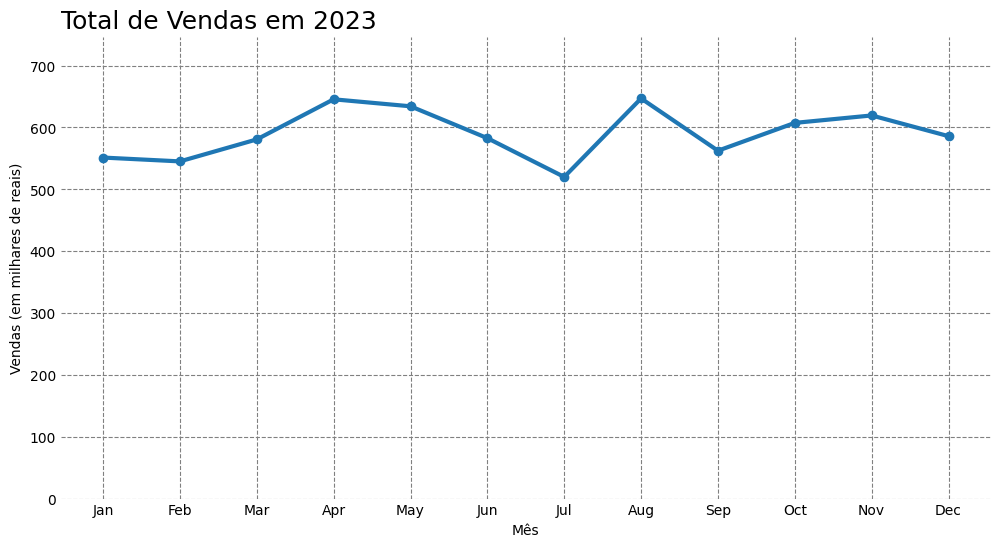

In [77]:
grafico_vendas_por_mes(vendas_por_mes, "vendas_por_mes.png")

### Lucro por Departamento Anual

Agora, vamos criar mais um visual e tabela consolidando os dados dos lucros por departamento da empresa.

Pegamos as colunas desejadas e agregamos pelo departamento, somando os valores que compartilham o mesmo departamento.

In [9]:
lucro_dpt = vendas[["departamento","lucro"]]

lucro_dpt = lucro_dpt.groupby("departamento").sum()
lucro_dpt = lucro_dpt.reset_index()
lucro_dpt

,departamento,lucro
0,Automotivo,230663.33
1,Jardinagem e paisagismo,196801.66
2,Materiais de construção,26793.53


Assim como no caso anterior, com a tabela gerada criamos o gráfico. Vamos construir um gráfico de barras para representar os lucros de cada departamento salvando em formato de imagem.

In [79]:
def grafico_lucro_por_departamento(df, filename):
  # Área do gráfico
  fig, ax = plt.subplots(figsize=(12,6),dpi=100)

  ax.barh(df["departamento"], df["lucro"])

  ## Personalizando o gráfico
  ax.set_title('Lucro por Departamento em 2023', fontsize = 18, loc='left')
  ax.set_frame_on(False)
  ax.set_xticklabels([])

  # remover todos os ticks do eixo x e y
  ax.tick_params(axis='both', which='both', length=0)

  # Valores nas barras
  for i, v in enumerate(df["lucro"]):
    ax.text(df["lucro"][i] + 1e3, i, f'R$ {df["lucro"][i]:,.2f}', fontsize = 12, ha = 'left', va='center')

  plt.savefig(filename, dpi=100, bbox_inches='tight', pad_inches=0)
  plt.show()

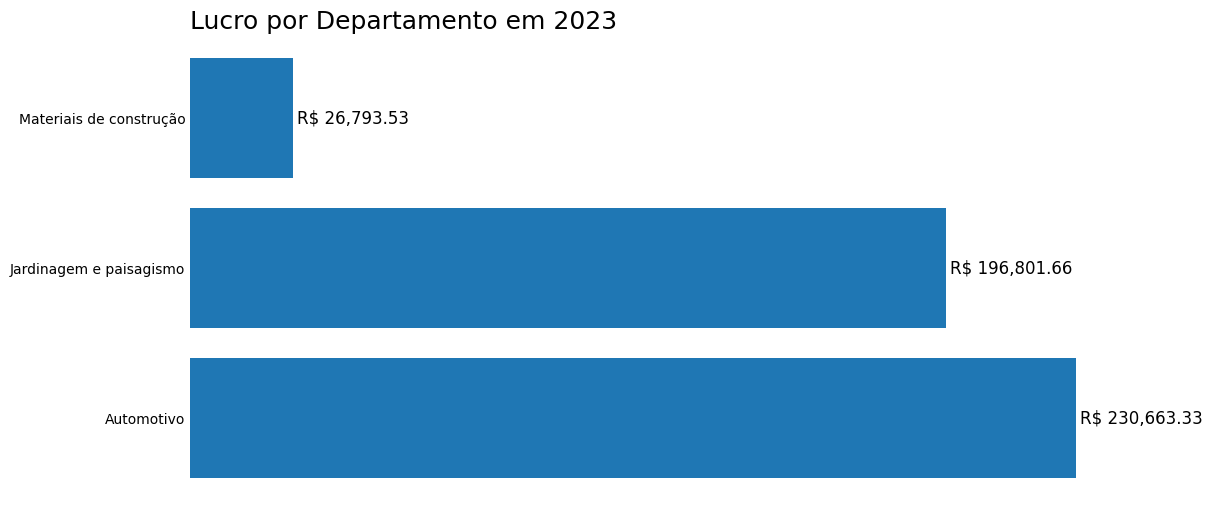

In [80]:
grafico_lucro_por_departamento(lucro_dpt, "lucro_dpt.png")

### Modos de Envio mais utilizados do Estado de São Paulo

Por fim, vamos gerar a tabela e gráfico que representa os modos de envios mais utilizados do Estado de São Paulo. Para isso, utilizamos a função `query()` que realiza uma consulta filtrando apenas os valores cujos clientes são de São Paulo e pegamos apenas a coluna de modo de envio.

Como os dados gerados são apenas os nomes do tipo de envio para cada caso, precisamos realizar uma contagem de frequência de cada um. Para isso, utilizamos o `value_counts()` e o `to_frame()` para exibir esses dados em formato de um DataFrame.

In [35]:
# Criando um df com os dados desejados
envio_sp = vendas.query('estado == "São Paulo"')[["modo_envio"]]

# Contando a quantidade de cada modo de envio
envio_sp = envio_sp.value_counts().to_frame()
envio_sp = envio_sp.reset_index()
envio_sp

,modo_envio,count
0,Entrega padrão,1344
1,Econômica,443
2,Envio rápido,336
3,24 horas,162


Vamos construir o último gráfico. Faremos um processo semelhante ao gráfico anterior, mudando o tipo de função de `barh` (barra horizontal) para `bar` (barra vertical ou colunas) e, claro, os dados que vão gerar o visual.

In [78]:
def grafico_modo_envio(df, filename):
  # Área do gráfico
  fig, ax = plt.subplots(figsize=(12,6),dpi=100)

  ax.bar(df["modo_envio"], df["count"])

  ## Personalizando o gráfico
  ax.set_title('Modos de Envio mais utilizados em São Paulo (2023)', fontsize = 18, loc='left')
  ax.set_frame_on(False)
  ax.set_yticklabels([])

  # remover todos os ticks do eixo x e y
  ax.tick_params(axis='both', which='both', length=0)

  # Valores nas barras
  for i, v in enumerate(df["count"]):
    ax.text(i, df["count"][i], df["count"][i], fontsize = 12, ha = 'center', va='bottom')

  plt.savefig(filename, dpi=100, bbox_inches='tight', pad_inches=0)
  plt.show()

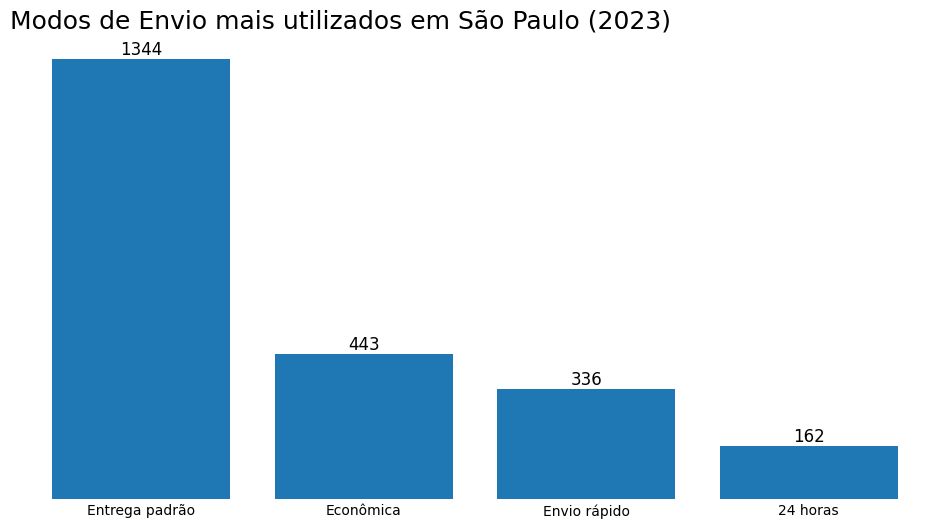

In [81]:
grafico_modo_envio(envio_sp, "envio_sp.png")

### Gerando o documento pdf

Agora, com os visuais e tabelas geradas, vamos partir para a criação do documento em pdf. Para isso, vamos instalar as bibliotecas abaixo:

In [50]:
!pip install fpdf dataframe_image

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 27.3 MB/s eta 0:00:00
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40702 sha256=89c08cc4c6da469a70433d51fe056771c41bfd1306bd5b36168cdd4121c9e05e
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [51]:
from fpdf import FPDF
import dataframe_image as dfi
import time

Os gráficos já estão salvos em imagem em nossa aba de arquivo, falta agora salvar também as tabelas geradas. Para isso utilizaremos a função `export` da `dataframe_image`.

In [56]:
dfi.export(vendas_por_mes, 'tab_vendas_por_mes.png', table_conversion="matplotlib")
dfi.export(lucro_dpt, 'tab_lucro_dpt.png', table_conversion="matplotlib")
dfi.export(envio_sp, 'tab_envio_sp.png', table_conversion="matplotlib")

Para facilitar a escrita do pdf, vamos criar duas funções personalizadas: uma para adicionar o título na 1ª página e outra para adicionar textos ao longo do documento

In [60]:
# Função para o título
def titulo(pdf, title):

    # Titulo principal
    pdf.set_font('Helvetica', 'b', 20)
    pdf.ln(10)
    pdf.write(5, title)
    pdf.ln(10)

    # Adicionando a data de geração do relatório
    pdf.set_font('Helvetica', '', 14)
    pdf.set_text_color(r=128, g=128, b=128)
    today = time.strftime("%d/%m/%Y")
    pdf.write(4, f'{today}')

    # Add line break
    pdf.ln(10)

# Função para o texto
def texto(pdf, txt):

    # Ajustando cor de texto, fonte e espaçamento
    pdf.set_text_color(0)
    pdf.set_font('Helvetica', '', 12)

    pdf.write(5, txt)

Agora, chegou a hora de criar o documento PDF! Vamos definir as posições de cada elemento, espaçamentos e páginas no documento.

Você pode observar com calma o que cada código realiza e acessar o [tutorial do FPDF](https://pyfpdf.readthedocs.io/en/latest/Tutorial/index.html) para compreender os métodos e variáveis utilizadas aqui.

In [94]:
# Variáveis globais
WIDTH = 210
HEIGHT = 297

# Criando o documento PDF
pdf = FPDF() # A4 (210 x 297 mm)

### Página 1 ###
pdf.add_page()

# Título
titulo(pdf, "Relatório do Desempenho de Vendas (2023)")

# Título da tabela
texto(pdf, "1. Tabela das Vendas por mês da empresa em 2023")
pdf.ln(10)

# Adicionando a tabela de vendas
pdf.image("tab_vendas_por_mes.png", WIDTH/2 - 20, w=40)
pdf.ln(20)

# Adicionando o gráfico de vendas
pdf.image("vendas_por_mes.png", 10, 150, WIDTH - 20)
pdf.ln(90)

# Texto explicativo
texto(pdf, "A visualização acima mostra a tendência das vendas da empresa durante o ano de 2023. Conseguimos notar " \
           "que em 5 meses no ano as vendas foram acima de 600 mil reais. Julho foi o mês com menor desempenho.")


### Página 2 ###
pdf.add_page()

# Título da tabela 2
pdf.ln(20)
texto(pdf, "2. Tabela dos Lucros por Departamento em 2023")
pdf.ln(10)

# Adicionando a tabela de lucro
pdf.image("tab_lucro_dpt.png", WIDTH/2 - 40, w=80)
pdf.ln(20)

# Adicionando o gráfico de lucro
pdf.image("lucro_dpt.png", 10, WIDTH/2, WIDTH - 20)
pdf.ln(120)

# Texto explicativo
texto(pdf, "O departamento que apresenta o maior lucro da empresa é o Automotivo. O resultado é esperado, visto que grande" \
           " parte dos produtos automotivos estão entre os mais caros por unidade. Na sequência temos os produtos de Jardinagem e" \
           " paisagismo, por fim, os materiais de construção com menos de R$ 30 mil de lucro em 2023.")

### Página 3 ###
pdf.add_page()

# Título da tabela 3
pdf.ln(20)
texto(pdf, "3. Tabela da quantidade de produtos por Modo de Envio em São Paulo (2023)")
pdf.ln(10)

# Adicionando a tabela de modo de envio
pdf.image("tab_envio_sp.png", WIDTH/2 - 40, w=60)
pdf.ln(20)

# Adicionando o gráfico de modo de envio
pdf.image("envio_sp.png", 10, WIDTH/2, WIDTH - 20)
pdf.ln(120)

# Texto explicativo
texto(pdf, "O modo de envio mais utilizado de forma disparada é a Entrega Padrão, corrrespondendo a quase 60% de todas as entregas em" \
           " São Paulo. Em seguida, temos a Econômica e Envio rápido e, por último, a de 24 horas com menos de 10% de entregas no estado.")

# Gerando o PDF
pdf.output("Relatório 2023.pdf", 'F')

''